# Getting and manipulating the meta data

In [132]:
import fstpy
import pathlib

from datetime import datetime
import numpy as np
import pandas as pd

## Method 1 - to_pandas with explicit instance

In [133]:
std_file = fstpy.StandardFileReader("/home/spst900/spooki/spooki_dir/pluginsRelatedStuff/testsFiles/coord_5005_big.std")
df = std_file.to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove("d")
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


## Method 2 - to_pandas without explicit instance

In [134]:
df = fstpy.StandardFileReader(
    "/home/spst900/spooki/spooki_dir/pluginsRelatedStuff/testsFiles/coord_5005_big.std"
).to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove("d")
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


# Get a dataframe from multiple standard files

In [135]:
# get files from today
dateTimeObj = datetime.now()
timestamp = dateTimeObj.strftime("%Y%m%d")  # (%H:%M:%S.%f)")
timestamp = "".join([timestamp, "00"])

GDPS_PATH = pathlib.Path("/fs/site5/eccc/prod/ops/suites/gdps/g1/gridpt.usr/prog/eta")
rdps_files = [f for f in GDPS_PATH.iterdir() if f.name.startswith(timestamp)]

# split the results
files = np.array_split(np.array(rdps_files), 4)

df = fstpy.StandardFileReader(list(files[0]), decode_metadata=True).to_pandas()
cols = list(df.columns)
cols.remove("d")

No fstpy internal unit found for 'deg|m', unit set to 'scalar'
No fstpy internal unit found for 'deg|m', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fstpy internal unit found for 'J/m²', unit set to 'scalar'
No fst

# See the contents of the dataframe

## Show the last rows of the dataframe

In [136]:
df[cols].tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
44755,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,211,0,...,False,False,False,False,False,False,False,False,False,False
44756,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,211,0,...,False,False,False,False,False,False,False,False,False,False
44761,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,173,0,...,False,False,False,False,False,False,False,False,False,False
44762,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,173,0,...,False,False,False,False,False,False,False,False,False,False
44765,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,82,0,...,False,False,False,False,False,False,False,False,False,False
44766,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,82,0,...,False,False,False,False,False,False,False,False,False,False
44773,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0,...,False,False,False,False,False,False,False,False,False,False
44774,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0,...,False,False,False,False,False,False,False,False,False,False
44779,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,143,0,...,False,False,False,False,False,False,False,False,False,False
44780,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,143,0,...,False,False,False,False,False,False,False,False,False,False


## Show column names of the dataframe

In [137]:
df.columns

Index(['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2',
       'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3',
       'ig4', 'datev', 'grid', 'd', 'label', 'run', 'implementation',
       'ensemble_member', 'etiket_format', 'unit', 'description',
       'date_of_observation', 'date_of_validity', 'forecast_hour',
       'data_type_str', 'level', 'ip1_kind', 'ip1_pkind', 'ip2_dec',
       'ip2_kind', 'ip2_pkind', 'ip3_dec', 'ip3_kind', 'ip3_pkind', 'surface',
       'follow_topography', 'ascending', 'interval', 'vctype',
       'multiple_modifications', 'zapped', 'filtered', 'interpolated',
       'unit_converted', 'bounded', 'missing_data', 'ensemble_extra_info',
       'masks', 'masked'],
      dtype='object')

## Show the levels contained in the dataframe

In [138]:
df.level

0        1.0000
1        0.0000
2        0.0102
3        0.0233
4        0.0374
          ...  
44766    0.0000
44773    0.0000
44774    0.0000
44779    0.0000
44780    0.0000
Name: level, Length: 44541, dtype: float32

## Show the unique levels contained in the dataframe

In [139]:
df.level.unique()

array([1.0000e+00, 0.0000e+00, 1.0200e-02, 2.3300e-02, 3.7400e-02,
       5.0800e-02, 6.2500e-02, 7.2000e-02, 7.9500e-02, 8.5200e-02,
       8.9700e-02, 9.4100e-02, 9.9000e-02, 1.0440e-01, 1.1040e-01,
       1.1720e-01, 1.2480e-01, 1.3340e-01, 1.4310e-01, 1.5410e-01,
       1.6670e-01, 1.8120e-01, 1.9760e-01, 2.1490e-01, 2.3310e-01,
       2.5220e-01, 2.7210e-01, 2.9280e-01, 3.1440e-01, 3.3690e-01,
       3.6020e-01, 3.8430e-01, 4.0910e-01, 4.3480e-01, 4.6120e-01,
       4.8830e-01, 5.1610e-01, 5.4460e-01, 5.7370e-01, 6.0340e-01,
       6.3370e-01, 6.6460e-01, 6.9590e-01, 7.2720e-01, 7.5670e-01,
       7.8450e-01, 8.1040e-01, 8.3460e-01, 8.5710e-01, 8.7800e-01,
       8.9730e-01, 9.1510e-01, 9.3160e-01, 9.4670e-01, 9.6060e-01,
       9.6700e-01, 9.7330e-01, 9.7920e-01, 9.8500e-01, 9.9000e-01,
       9.9500e-01, 9.9750e-01, 3.0000e+00, 4.0000e+00, 5.0000e+00,
       2.0000e+00, 6.8839e+04], dtype=float32)

## Show a subset of columns of the dataframe

In [140]:
df[["nomvar", "typvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2", "ip3"]]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3
0,TD,P,G1_9_0_0N,1801,1251,1,476856800,12000,84,0
1,WW,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0
2,WW,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0
3,WW,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0
4,WW,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0
...,...,...,...,...,...,...,...,...,...,...
44766,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,82,0
44773,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0
44774,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0
44779,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,143,0


## Show a voir like output of the dataframe

In [141]:
fstpy.voir(df.head(10))


  nomvar typvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3  deet  npas datyp  nbits grtyp    ig1    ig2  ig3  ig4 etiket_format  masks  masked
0     TD      P  G1_9_0_0N  1801  1251   1 2024-10-29  12000   84    0   450   672     f     12     Z  68839  90098    0    0     2,6,1,0,D  False   False
1     WW      P  G1_9_0_0N  1801  1251   1 2024-10-29   2852   84    0   450   672     f     12     Z  68839  90098    0    0     2,6,1,0,D  False   False
2     WW      P  G1_9_0_0N  1801  1251   1 2024-10-29   2795   84    0   450   672     f     12     Z  68839  90098    0    0     2,6,1,0,D  False   False
3     WW      P  G1_9_0_0N  1801  1251   1 2024-10-29   2720   84    0   450   672     f     12     Z  68839  90098    0    0     2,6,1,0,D  False   False
4     WW      P  G1_9_0_0N  1801  1251   1 2024-10-29   2625   84    0   450   672     f     12     Z  68839  90098    0    0     2,6,1,0,D  False   False
5     WW      P  G1_9_0_0N  1801  1251   1 2024-10-29   2508   84    

# Select sub-sets of data

## Select TT with query method

In [142]:
sel_tt_df = df.query('nomvar=="TT"')
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
497,TT,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0,...,False,False,False,False,False,False,False,False,False,False
498,TT,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0,...,False,False,False,False,False,False,False,False,False,False
499,TT,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0,...,False,False,False,False,False,False,False,False,False,False
500,TT,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0,...,False,False,False,False,False,False,False,False,False,False
501,TT,P,G1_9_0_0N,1801,1251,1,476856800,2508,84,0,...,False,False,False,False,False,False,False,False,False,False
502,TT,P,G1_9_0_0N,1801,1251,1,476856800,2625,84,0,...,False,False,False,False,False,False,False,False,False,False
503,TT,P,G1_9_0_0N,1801,1251,1,476856800,2720,84,0,...,False,False,False,False,False,False,False,False,False,False
504,TT,P,G1_9_0_0N,1801,1251,1,476856800,2795,84,0,...,False,False,False,False,False,False,False,False,False,False
505,TT,P,G1_9_0_0N,1801,1251,1,476856800,2852,84,0,...,False,False,False,False,False,False,False,False,False,False
506,TT,P,G1_9_0_0N,1801,1251,1,476856800,2897,84,0,...,False,False,False,False,False,False,False,False,False,False


## Select TT with loc method - more efficient

In [143]:
sel_tt_df = df.loc[df.nomvar == "TT"]
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
497,TT,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0,...,False,False,False,False,False,False,False,False,False,False
498,TT,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0,...,False,False,False,False,False,False,False,False,False,False
499,TT,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0,...,False,False,False,False,False,False,False,False,False,False
500,TT,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0,...,False,False,False,False,False,False,False,False,False,False
501,TT,P,G1_9_0_0N,1801,1251,1,476856800,2508,84,0,...,False,False,False,False,False,False,False,False,False,False
502,TT,P,G1_9_0_0N,1801,1251,1,476856800,2625,84,0,...,False,False,False,False,False,False,False,False,False,False
503,TT,P,G1_9_0_0N,1801,1251,1,476856800,2720,84,0,...,False,False,False,False,False,False,False,False,False,False
504,TT,P,G1_9_0_0N,1801,1251,1,476856800,2795,84,0,...,False,False,False,False,False,False,False,False,False,False
505,TT,P,G1_9_0_0N,1801,1251,1,476856800,2852,84,0,...,False,False,False,False,False,False,False,False,False,False
506,TT,P,G1_9_0_0N,1801,1251,1,476856800,2897,84,0,...,False,False,False,False,False,False,False,False,False,False


## Select multiple fields

In [144]:
sel_uuvv_df = df.loc[df.nomvar.isin(["UU", "VV"])]
sel_uuvv_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
311,UU,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0,...,False,False,False,False,False,False,False,False,False,False
312,VV,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0,...,False,False,False,False,False,False,False,False,False,False
313,UU,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0,...,False,False,False,False,False,False,False,False,False,False
314,VV,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0,...,False,False,False,False,False,False,False,False,False,False
315,UU,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0,...,False,False,False,False,False,False,False,False,False,False
316,VV,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0,...,False,False,False,False,False,False,False,False,False,False
317,UU,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0,...,False,False,False,False,False,False,False,False,False,False
318,VV,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0,...,False,False,False,False,False,False,False,False,False,False
319,UU,P,G1_9_0_0N,1801,1251,1,476856800,2508,84,0,...,False,False,False,False,False,False,False,False,False,False
320,VV,P,G1_9_0_0N,1801,1251,1,476856800,2508,84,0,...,False,False,False,False,False,False,False,False,False,False


## Select multiple fields with more than one condition

In [145]:
sel_uuvv6_df = df.loc[(df.nomvar.isin(["UU", "VV"])) & (df.ip2 == 6)]
sel_uuvv6_df.tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked


## Selecting by date range

In [146]:
# define a start and end date
start_date = datetime(dateTimeObj.year, dateTimeObj.month, dateTimeObj.day)
end_date = datetime(dateTimeObj.year, dateTimeObj.month, dateTimeObj.day + 1, 23)

df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]

/tmp/gha000/2665881/ipykernel_2897827/2821006593.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
1614,TD,P,G1_9_0_0N,1801,1251,1,476856800,12000,38,0,...,False,False,False,False,False,False,False,False,False,False
1615,WW,P,G1_9_0_0N,1801,1251,1,476856800,2000,38,0,...,False,False,False,False,False,False,False,False,False,False
1616,WW,P,G1_9_0_0N,1801,1251,1,476856800,2102,38,0,...,False,False,False,False,False,False,False,False,False,False
1617,WW,P,G1_9_0_0N,1801,1251,1,476856800,2233,38,0,...,False,False,False,False,False,False,False,False,False,False
1618,WW,P,G1_9_0_0N,1801,1251,1,476856800,2374,38,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44690,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,42,0,...,False,False,False,False,False,False,False,False,False,False
44697,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,8,0,...,False,False,False,False,False,False,False,False,False,False
44698,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,8,0,...,False,False,False,False,False,False,False,False,False,False
44749,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,29,0,...,False,False,False,False,False,False,False,False,False,False


# Modify meta data

## Change nomvar from TT to TTI

In [147]:
df.loc[df.nomvar == "TT", "nomvar"] = "TTI"
print(df.loc[df.nomvar == "TTI"])
# rename again
df.loc[df.nomvar == "TTI", "nomvar"] = "TT"

      nomvar typvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3  \
497      TTI      P  G1_9_0_0N  1801  1251   1  476856800   2000   84    0   
498      TTI      P  G1_9_0_0N  1801  1251   1  476856800   2102   84    0   
499      TTI      P  G1_9_0_0N  1801  1251   1  476856800   2233   84    0   
500      TTI      P  G1_9_0_0N  1801  1251   1  476856800   2374   84    0   
501      TTI      P  G1_9_0_0N  1801  1251   1  476856800   2508   84    0   
...      ...    ...        ...   ...   ...  ..        ...    ...  ...  ...   
37676    TTI      P  G1_9_0_0N  1801  1251   1  476856800  11850  143    0   
37677    TTI      P  G1_9_0_0N  1801  1251   1  476856800  11900  143    0   
37678    TTI      P  G1_9_0_0N  1801  1251   1  476856800  11950  143    0   
37679    TTI      P  G1_9_0_0N  1801  1251   1  476856800  11975  143    0   
37680    TTI      P  G1_9_0_0N  1801  1251   1  476856800  12000  143    0   

       ...  multiple_modifications  zapped  filtered  interpola

# Reformatting meta data for other types or structures

## Changind the column names

In [148]:
translation = {"nomvar": "fieldName", "etiket": "pdsLabel", "dateo": "dateOfObservation"}
new_df = df.rename(columns=translation)
cols = list(new_df.columns)
cols.remove("d")
new_df[cols]

,fieldName,typvar,pdsLabel,ni,nj,nk,dateOfObservation,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
0,TD,P,G1_9_0_0N,1801,1251,1,476856800,12000,84,0,...,False,False,False,False,False,False,False,False,False,False
1,WW,P,G1_9_0_0N,1801,1251,1,476856800,2000,84,0,...,False,False,False,False,False,False,False,False,False,False
2,WW,P,G1_9_0_0N,1801,1251,1,476856800,2102,84,0,...,False,False,False,False,False,False,False,False,False,False
3,WW,P,G1_9_0_0N,1801,1251,1,476856800,2233,84,0,...,False,False,False,False,False,False,False,False,False,False
4,WW,P,G1_9_0_0N,1801,1251,1,476856800,2374,84,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44766,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,82,0,...,False,False,False,False,False,False,False,False,False,False
44773,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0,...,False,False,False,False,False,False,False,False,False,False
44774,PT,P,G1_9_0_0N,1801,1251,1,476856800,0,215,0,...,False,False,False,False,False,False,False,False,False,False
44779,P0,P,G1_9_0_0N,1801,1251,1,476856800,0,143,0,...,False,False,False,False,False,False,False,False,False,False


# Working with data

## Getting the associated data for each record in the dataframe

In [149]:
uu_df = df.loc[(df.nomvar == "UU") & (df.surface == True)]
vv_df = df.loc[(df.nomvar == "VV") & (df.surface == True)]

uu_data_df = fstpy.compute(uu_df)

cols = ["nomvar", "ni", "nj", "nk", "dateo", "ip1", "ip2", "ip3", "d"]

print(uu_data_df[cols])

Read(994) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000         0         0      450        0  f 16  Z 68839 90098     0     0
Read(993) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000         8         0      450       64  f 16  Z 68839 90098     0     0
Read(992) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        11         0      450       88  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        15         0      450      120  f 16  Z 68839 90098     0     0
Read(990) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        18         0      450      144  f 16  Z 68839 90098     0     0
Read(989) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        19         0      450      152  f 16  Z 68839 90098     0     0
Read(999) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        29         0      450

# Performing simple calculations

## Wind Modulus

### Create a record to hold the result

In [150]:
uv_df = vv_df.copy(deep=True)

### Get a fresh index starting from 0 and change the nomvar accordingly

In [151]:
uv_df = uv_df.reset_index(drop=True)
uv_df.loc[:, "nomvar"] = "UV"

### Get the first rows for uu and vv

In [152]:
uu = uu_df.iloc[0]["d"]
vv = vv_df.iloc[0]["d"]

### The algorithm, after this uv_df contains our result for the wind modulus in knots

In [153]:
uv = (uu**2 + vv**2) ** 0.5
# store the result in the dataframe
uv_df.at[0, "d"] = uv
print("UU\n", uu.compute())
print("VV\n", vv.compute())

Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
UU
 [[ -8.884949   -7.125183   -8.31073   ... -10.455261  -10.21698
  -10.207214 ]
 [ -8.879089   -7.121277   -8.3029175 ... -10.461121  -10.218933
  -10.207214 ]
 [ -8.875183   -7.1154175  -8.293152  ... -10.46698   -10.220886
  -10.207214 ]
 ...
 [ -8.8

### Visualize dask operations

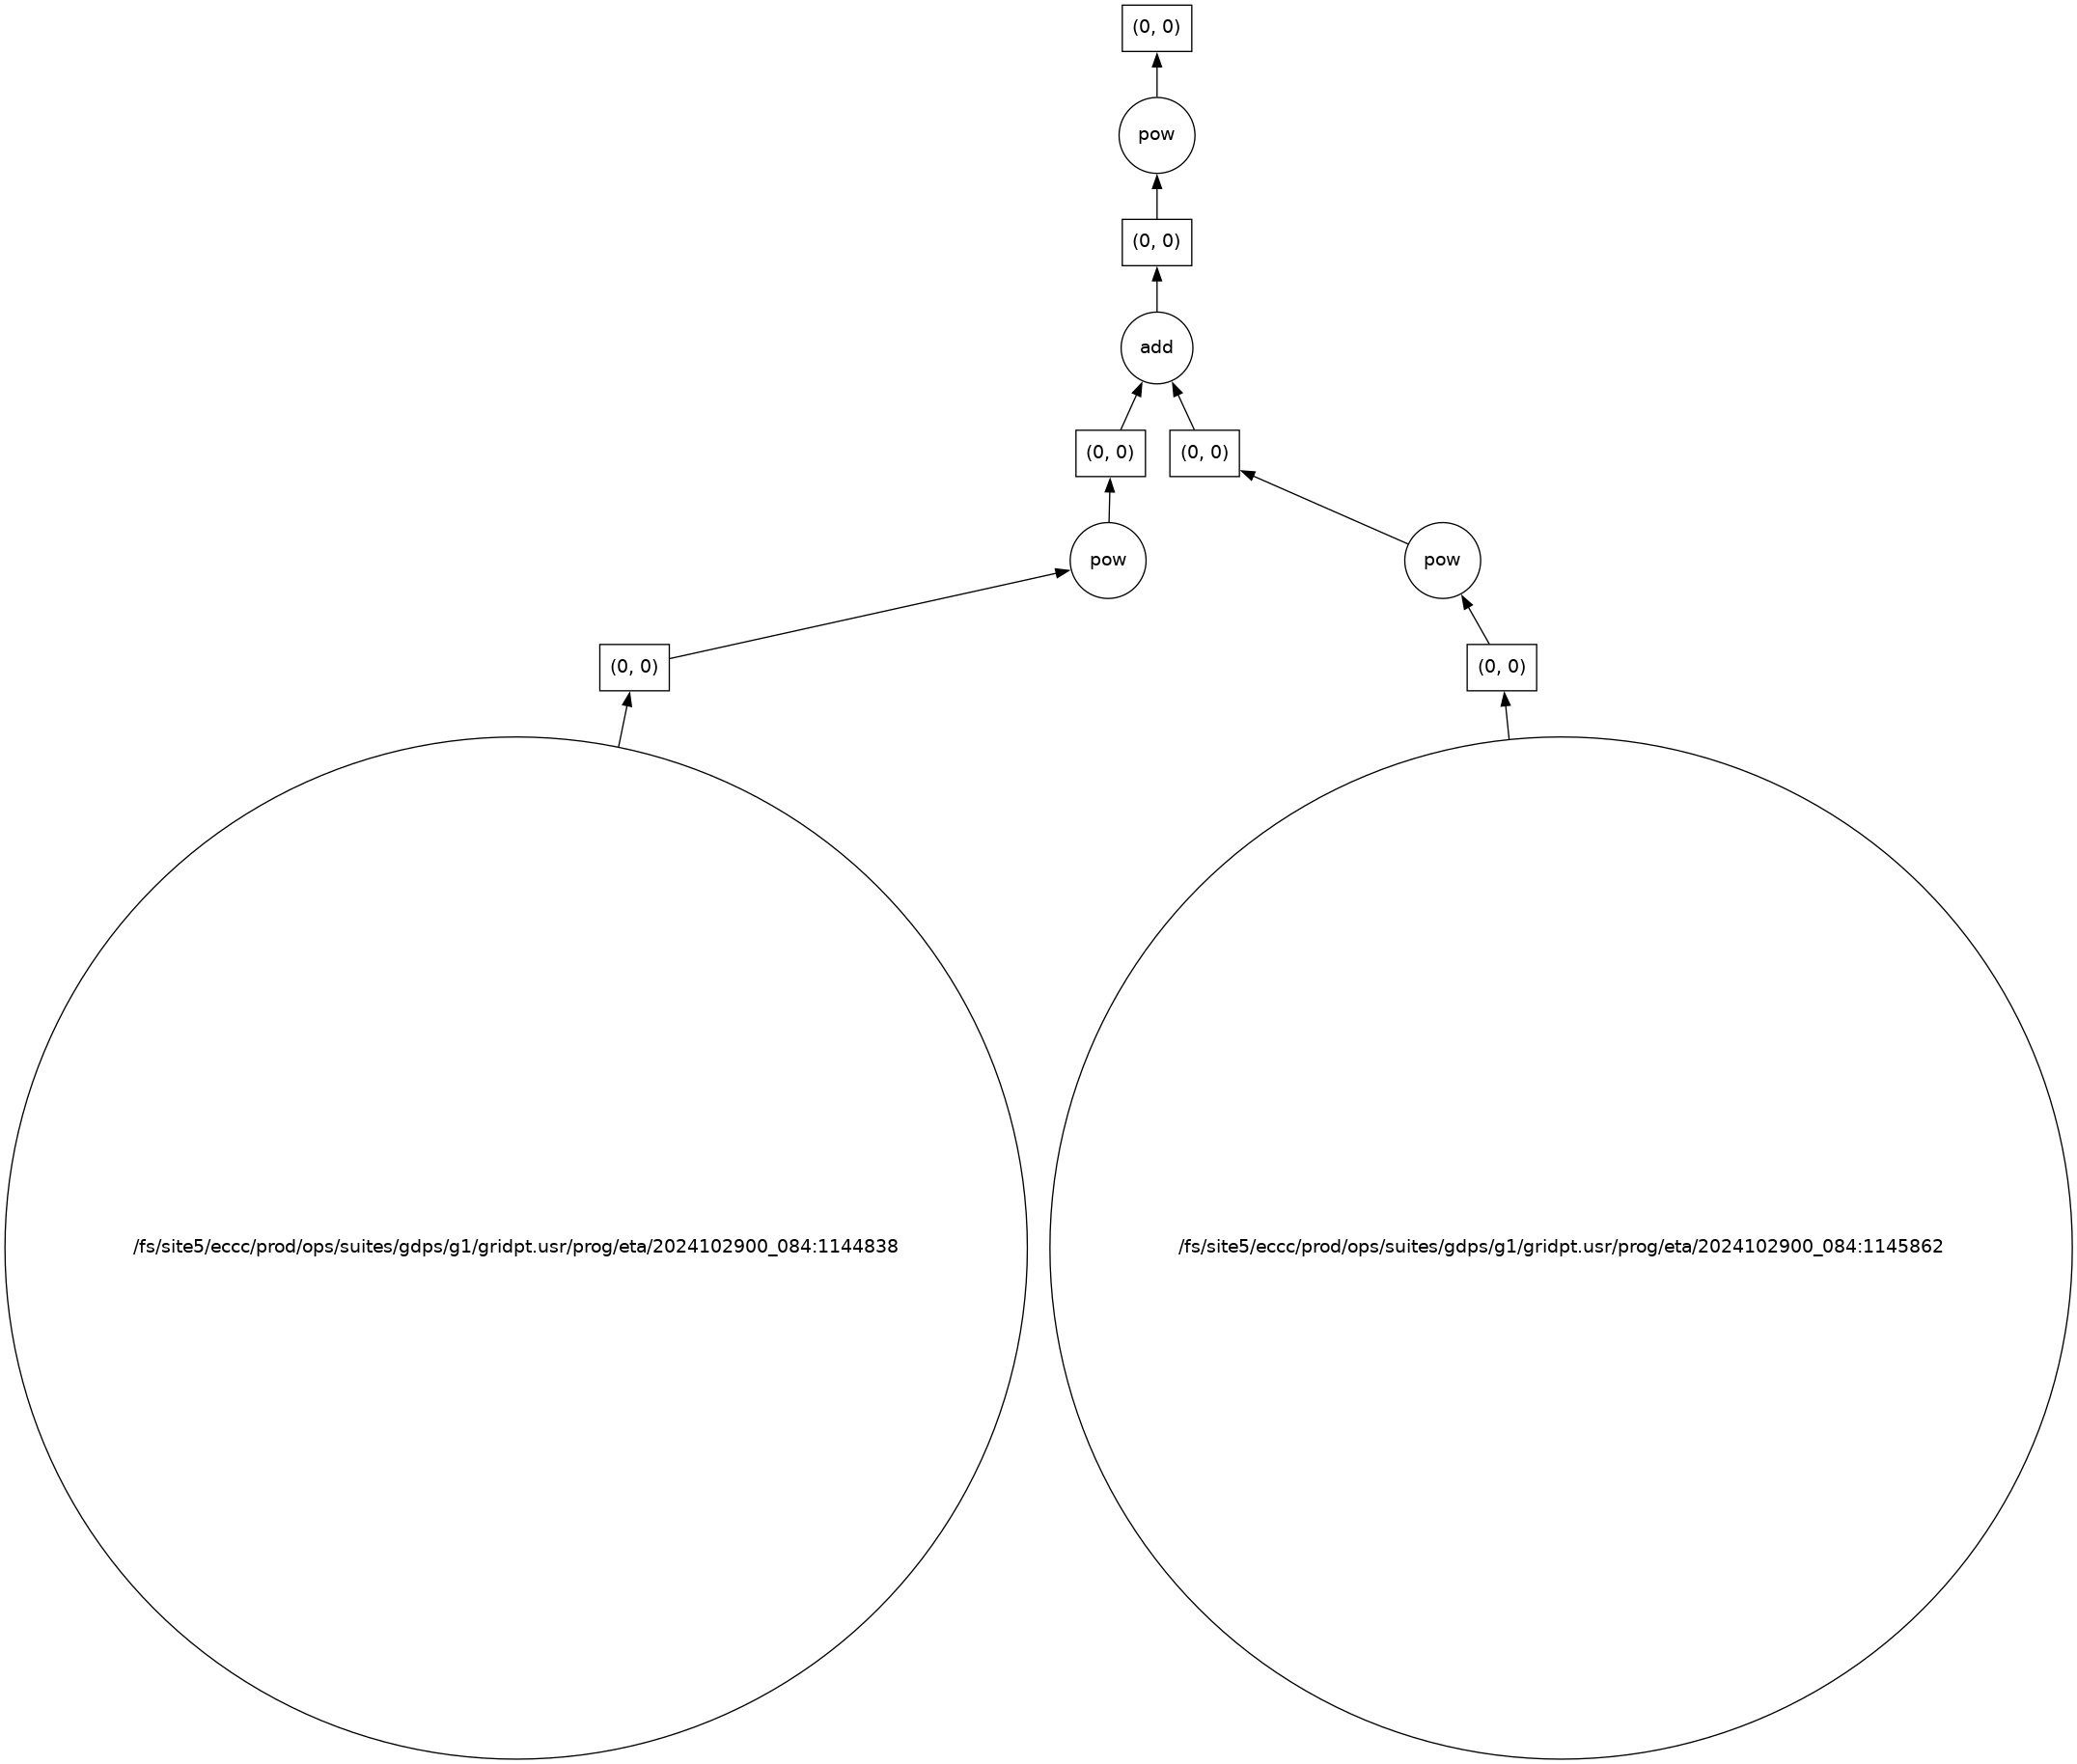

In [154]:
uv_df.iloc[0]["d"].visualize()

In [155]:
print("UV\n", uv_df.iloc[0]["d"].compute())

Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
UV
 [[ 9.013873   7.7067795  9.544189  ... 10.481677  10.235459  10.209719 ]
 [ 9.013419   7.7173934  9.562477  ... 10.484956  10.235469  10.209037 ]
 [ 9.015344   7.726374   9.580292  ... 10.488243  10.235586  10.208433 ]
 ...
 [ 9.012557   7.6871367  9.510054  ... 10.475674  10.233816  10.211517 ]
 [ 9.014115   7.698141   9.52785   ... 10.478678  10.233609  10.210558 ]
 [ 9.013873   7.7067795  9.544189  ... 10.481677  10.235459  10.209719 ]]


In [156]:
# internal structure of the dask array
uv_df.iloc[0]["d"]

dask.array<pow, shape=(1801, 1251), dtype=float32, chunksize=(1801, 1251), chunktype=numpy.ndarray>

## Wind Chill

In [157]:
tt_df = df.loc[(df.nomvar == "TT") & (df.surface == True)]

### Create a record to hold wind chill reseult and change the nomvar

In [158]:
re_df = uv_df.copy(deep=True)
re_df["nomvar"] = "RE"

### The algorithm, after this re_df contains our result for the wind chill

In [159]:
tt = tt_df.iloc[0]["d"]
uv = uv_df.iloc[0]["d"]

In [160]:
# if (tt <= 0) & (uv >= 5) then
#    re = 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 )
# else
#    re = tt
re_df.at[0, "d"] = np.where((tt <= 0) & (uv >= 5), 13.12 + 0.6215 * tt + (0.3965 * tt - 11.37) * (uv**0.16), tt)
print("TT\n", tt.compute())

Read(991) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450

### Visualize dask operations

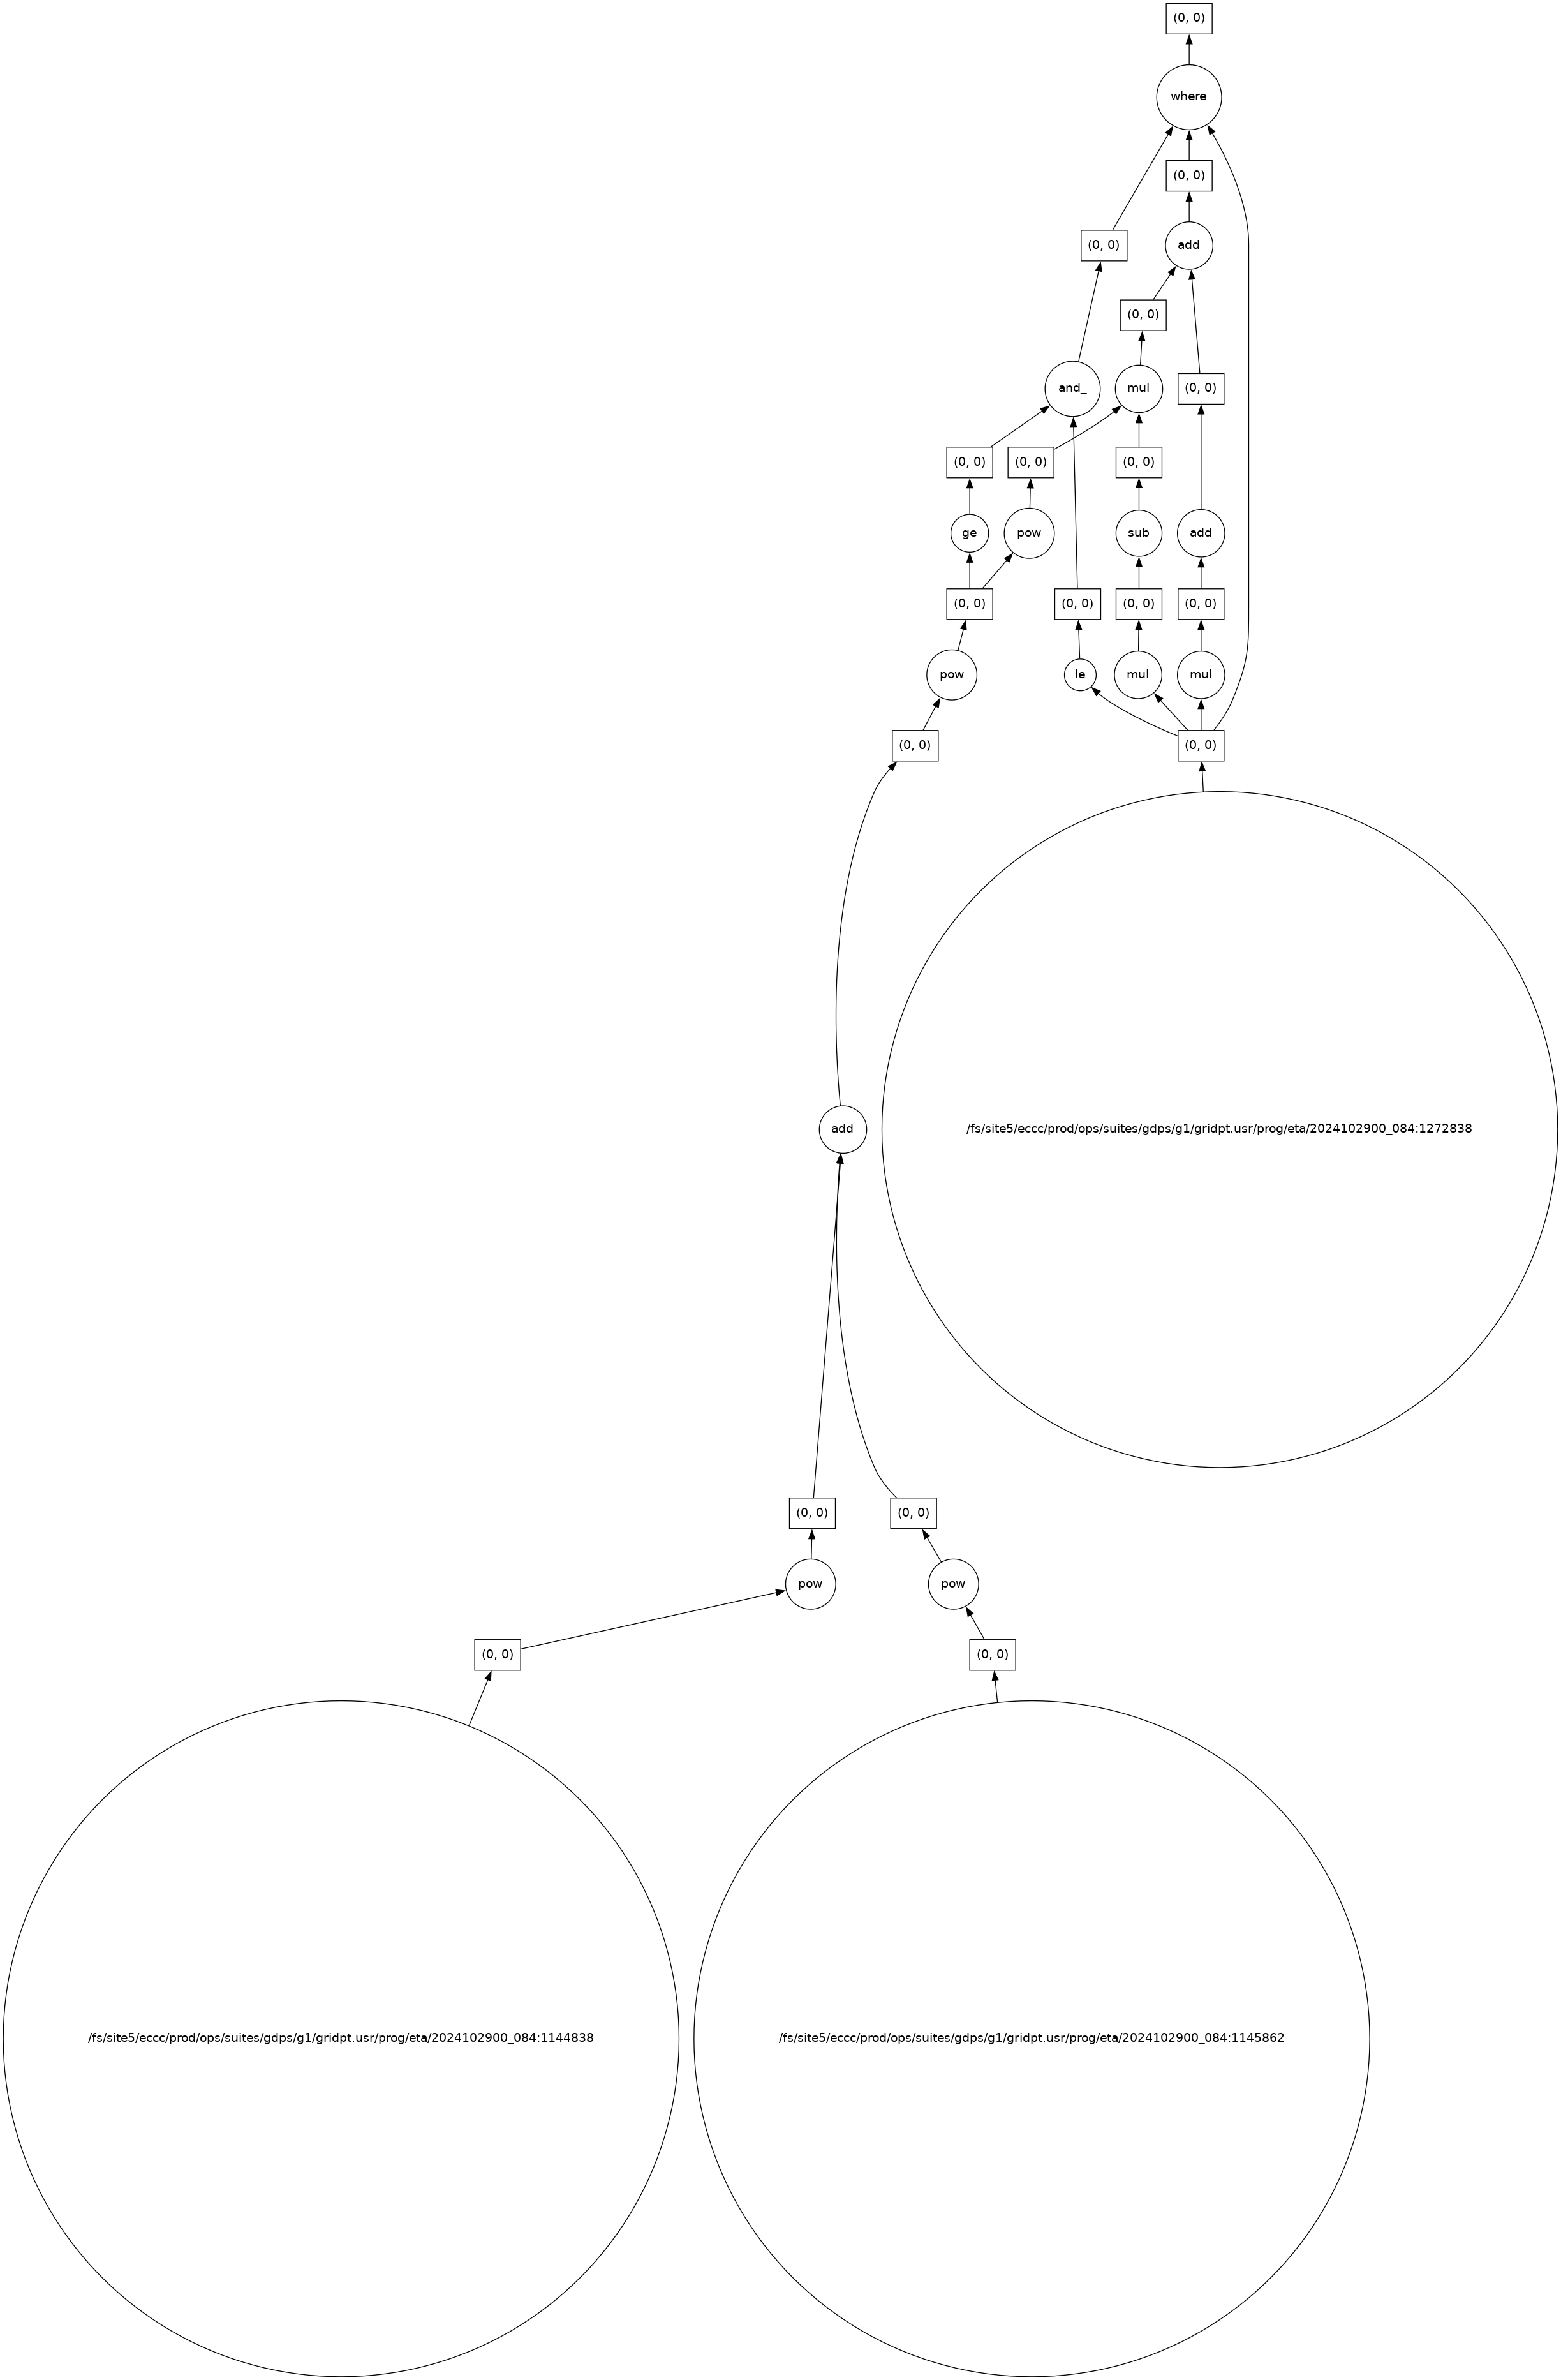

In [161]:
re_df.iloc[0]["d"].visualize()

In [162]:
print("RE\n", re_df.iloc[0]["d"].compute())

Read(991) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) UU   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
Read(991) VV   P  G1_9_0_0N        1801    1251     1  476856800        12000        84         0      450      672  f 16  Z 68839 90098     0     0
RE
 [[-49.203827  -47.79129   -48.06382   ...  -8.928343   -9.1195755
   -9.394591 ]
 [-49.20352   -47.79714   -48.07306   ...  -8.926962   -9.119579
   -9.394385 ]
 [-49.204823  -47.801727  -48.079655  ...  -8.927925   -9.119614
   -9.394202 ]
 ...
 [-49.202934  -47.77849   -48.051476  ...  -8.928924   -9.121419
   -9.395139 ]
 [-49.20399   -47.784657  -48.05812   ...  -8.927464   -9.121356
   -9.394847 ]
 [-49.203827  -47.79129   -48.06382   ...  -8.928343   -9.1195755
   -9.394591 ]]


## Basic statistics for TT records

### Create a function to compute statistics

In [163]:
def compute_basic_stats(df: pd.DataFrame) -> pd.DataFrame:
    """compute for each row in a datarfame, min, max, mean, standard_deviation and the 2d indice of min and max

    :param df: input dataframe
    :type df: pd.DataFrame
    :return: output dataframe with extra columns
    :rtype: pd.DataFrame
    """
    df = fstpy.compute(df)
    df["min"] = None
    df["max"] = None
    df["mean"] = None
    df["std"] = None
    df["min_pos"] = None
    df["max_pos"] = None
    for i in df.index:
        df.at[i, "mean"] = df.loc[i, "d"].mean()
        df.at[i, "std"] = df.loc[i, "d"].std()
        df.at[i, "min"] = df.loc[i, "d"].min()
        df.at[i, "max"] = df.loc[i, "d"].max()
        # index (i,j) of min in record
        df.at[i, "min_pos"] = np.unravel_index(df.at[i, "d"].argmin(), (df.at[i, "ni"], df.at[i, "nj"]))
        df.at[i, "min_pos"] = (df.at[i, "min_pos"][0] + 1, df.at[i, "min_pos"][1] + 1)
        # index (i,j) of max in record
        df.at[i, "max_pos"] = np.unravel_index(df.at[i, "d"].argmax(), (df.at[i, "ni"], df.at[i, "nj"]))
        df.at[i, "max_pos"] = (df.at[i, "max_pos"][0] + 1, df.at[i, "max_pos"][1] + 1)
    return df

In [164]:
new_df = compute_basic_stats(tt_df)
new_df

Read(990) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000         0         0      450        0  f 16  Z 68839 90098     0     0
Read(989) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000         8         0      450       64  f 16  Z 68839 90098     0     0
Read(999) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        11         0      450       88  f 16  Z 68839 90098     0     0
Read(998) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        15         0      450      120  f 16  Z 68839 90098     0     0
Read(997) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        18         0      450      144  f 16  Z 68839 90098     0     0
Read(996) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        19         0      450      152  f 16  Z 68839 90098     0     0
Read(995) TT   P  G1_9_0_0N        1801    1251     1  476856800        12000        29         0      450

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,missing_data,ensemble_extra_info,masks,masked,min,max,mean,std,min_pos,max_pos
558,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,84,0,...,False,False,False,False,-45.68409,40.286613,6.703557,19.131105,"(393, 56)","(238, 511)"
1365,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,66,0,...,False,False,False,False,-50.165371,40.668613,6.593911,18.739513,"(365, 52)","(1474, 583)"
2172,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,38,0,...,False,False,False,False,-49.573856,40.328487,7.053024,18.780745,"(1596, 1117)","(236, 509)"
2979,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,189,0,...,False,False,False,False,-53.283234,39.396454,5.274378,19.669466,"(433, 77)","(1515, 617)"
3786,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,213,0,...,False,False,False,False,-54.291737,39.833263,5.184911,19.800041,"(449, 72)","(1499, 461)"
4593,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,195,0,...,False,False,False,False,-49.257347,43.150856,5.205739,19.460247,"(384, 67)","(591, 482)"
5400,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,51,0,...,False,False,False,False,-51.363186,42.068455,6.400643,18.344164,"(199, 77)","(588, 480)"
6207,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,122,0,...,False,False,False,False,-48.904942,43.366543,5.745246,19.007727,"(70, 94)","(682, 454)"
7014,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,46,0,...,False,False,False,False,-52.474438,37.922047,6.418769,18.534025,"(344, 60)","(1470, 422)"
7821,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,177,0,...,False,False,False,False,-45.411312,43.953922,5.975661,19.521418,"(967, 12)","(593, 481)"


## Basic statistics for each column of 3d matrix

In [165]:
tt3d_df = df.loc[(df.nomvar == "TT") & (df.ip2 == np.sort(df.ip2.unique())[0])].reset_index(drop=True)
# sort by level and reset index
tt3d_df = tt3d_df.sort_values(by="level", ascending=tt3d_df.iloc[0]["ascending"]).reset_index(drop=True)
tt3d_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info,masks,masked
0,TT,P,G1_9_0_0N,1801,1251,1,476856800,12000,0,0,...,False,False,False,False,False,False,False,False,False,False
1,TT,P,G1_9_0_0N,1801,1251,1,476856800,11975,0,0,...,False,False,False,False,False,False,False,False,False,False
2,TT,P,G1_9_0_0N,1801,1251,1,476856800,11950,0,0,...,False,False,False,False,False,False,False,False,False,False
3,TT,P,G1_9_0_0N,1801,1251,1,476856800,11900,0,0,...,False,False,False,False,False,False,False,False,False,False
4,TT,P,G1_9_0_0N,1801,1251,1,476856800,11850,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,TT,P,G1_9_0_0N,1801,1251,1,476856800,2508,0,0,...,False,False,False,False,False,False,False,False,False,False
58,TT,P,G1_9_0_0N,1801,1251,1,476856800,2374,0,0,...,False,False,False,False,False,False,False,False,False,False
59,TT,P,G1_9_0_0N,1801,1251,1,476856800,2233,0,0,...,False,False,False,False,False,False,False,False,False,False
60,TT,P,G1_9_0_0N,1801,1251,1,476856800,2102,0,0,...,False,False,False,False,False,False,False,False,False,False


### Create containers for our results

In [166]:
# creates a 1 row dataframe based on a model dataframe
def create_result_df(df: pd.DataFrame, nomvar: str, operation_name: str) -> pd.DataFrame:
    res_df = pd.DataFrame([df.iloc[0].to_dict()])
    res_df["nomvar"] = nomvar
    res_df["etiket"] = operation_name
    return res_df


min_df = create_result_df(tt_df, "MIN", "MINIMUM")
max_df = create_result_df(tt_df, "MAX", "MAXIMUM")
std_df = create_result_df(tt_df, "STD", "STDDEV")
mean_df = create_result_df(tt_df, "MEAN", "AVERAGE")

# Grouping data

## Grouping data by grid, the usual case when you have multiple grids in a dataframe

In [167]:
grid_groups = df.groupby(by="grid")

for grid, grid_df in grid_groups:
    print(f"grid: {grid}")
    print(grid_df[["nomvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2", "ip3"]])

grid: 6883990098
      nomvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3
0         TD  G1_9_0_0N  1801  1251   1  476856800  12000   84    0
1         WW  G1_9_0_0N  1801  1251   1  476856800   2000   84    0
2         WW  G1_9_0_0N  1801  1251   1  476856800   2102   84    0
3         WW  G1_9_0_0N  1801  1251   1  476856800   2233   84    0
4         WW  G1_9_0_0N  1801  1251   1  476856800   2374   84    0
...      ...        ...   ...   ...  ..        ...    ...  ...  ...
44766     PT  G1_9_0_0N  1801  1251   1  476856800      0   82    0
44773     P0  G1_9_0_0N  1801  1251   1  476856800      0  215    0
44774     PT  G1_9_0_0N  1801  1251   1  476856800      0  215    0
44779     P0  G1_9_0_0N  1801  1251   1  476856800      0  143    0
44780     PT  G1_9_0_0N  1801  1251   1  476856800      0  143    0

[44541 rows x 9 columns]


## Grouping data by forecast hour, the usual case when you have multiple forecast hours per grid in a dataframe

In [168]:
forecast_hour_groups = df.loc[df.nomvar == "TT"].groupby(by=["grid", "forecast_hour"])

for (grid, fhour), forecast_hour_df in forecast_hour_groups:
    print(f"grid: {grid} forecast_hour: {fhour}")
    print(forecast_hour_df.head(2)[["nomvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2", "ip3"]])

grid: 6883990098 forecast_hour: 0 days 00:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
27935     TT  G1_9_0_0N  1801  1251   1  476856800  2000    0    0
27936     TT  G1_9_0_0N  1801  1251   1  476856800  2102    0    0
grid: 6883990098 forecast_hour: 0 days 08:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
31163     TT  G1_9_0_0N  1801  1251   1  476856800  2000    8    0
31164     TT  G1_9_0_0N  1801  1251   1  476856800  2102    8    0
grid: 6883990098 forecast_hour: 0 days 11:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
25514     TT  G1_9_0_0N  1801  1251   1  476856800  2000   11    0
25515     TT  G1_9_0_0N  1801  1251   1  476856800  2102   11    0
grid: 6883990098 forecast_hour: 0 days 15:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
24707     TT  G1_9_0_0N  1801  1251   1  476856800  2000   15    0
24708     TT  G1_9_0_0N  1801  1251   1  476856800  2102   15    0
grid

## Grouping data by level, the usual case when you have multiple levels per grid in a dataframe

In [169]:
levels_groups = df.loc[df.nomvar == "UU"].groupby(by=["grid", "level"])

for (grid, level), level_df in levels_groups:
    print(f"grid: {grid} level: {level}")
    print(level_df.head(2)[["nomvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2", "ip3"]])

grid: 6883990098 level: 0.0
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
311      UU  G1_9_0_0N  1801  1251   1  476856800  2000   84    0
1118     UU  G1_9_0_0N  1801  1251   1  476856800  2000   66    0
grid: 6883990098 level: 0.010200000368058681
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
313      UU  G1_9_0_0N  1801  1251   1  476856800  2102   84    0
1120     UU  G1_9_0_0N  1801  1251   1  476856800  2102   66    0
grid: 6883990098 level: 0.02329999953508377
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
315      UU  G1_9_0_0N  1801  1251   1  476856800  2233   84    0
1122     UU  G1_9_0_0N  1801  1251   1  476856800  2233   66    0
grid: 6883990098 level: 0.03739999979734421
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
317      UU  G1_9_0_0N  1801  1251   1  476856800  2374   84    0
1124     UU  G1_9_0_0N  1801  1251   1  476856800  2374   66    0
grid: 6883990098 level: 0.05079999938607216
   

# Exporting the data

## To standardfile 

In [170]:
from os import getenv
import fstpy

df = fstpy.StandardFileReader(
    "/home/spst900/spooki/spooki_dir/pluginsRelatedStuff/testsFiles/coord_5005_big.std"
).to_pandas()
tt_df = df.loc[df.nomvar == "TT"]
user = getenv("USER")
file = f"/tmp/{user}/TT.std"
fstpy.delete_file(file)
fstpy.StandardFileWriter(file, tt_df).to_fst()

Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300       72  f 16  Z 33792 77761     1     0
Read(998) TT   P  R1_V710_N        1108    1082     1  442998800     95294295         6         0      300

### Check the file

In [171]:
df = fstpy.StandardFileReader(file).to_pandas()
cols = list(df.columns)
cols.remove("d")
df[cols]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761


## To pickle

In [172]:
pickle_file = f"/tmp/{user}/pickle_data.pkl.bz2"
fstpy.delete_file(pickle_file)
df.to_pickle(pickle_file)

### Check the file

In [173]:
df = pd.read_pickle(pickle_file)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."


In [174]:
df = fstpy.compute(df)
df

Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     76696048         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(997) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[26.068878, 26.084503, 26.108917, 26.167511, ..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.86026, 15.958893, 16.014557, 16.121979, 1..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[14.96785, 15.049881, 15.1201935, 15.15535, 1..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-43.06671, -43.033997, -43.00226, -42.972473..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-41.939545, -41.942474, -41.94687, -41.95077..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-6.3888702, -6.367386, -6.3507843, -6.339065..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-27.158905, -27.167206, -27.174042, -27.1794..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-36.064682, -36.0598, -36.051987, -36.041733..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.487396, 15.331146, 14.937592, 14.422943, ..."
